In [12]:
# Configure autoreload 
%load_ext autoreload
%autoreload 2

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import re
import os
from easyocr import Reader

/Users/mariano/Documents/Projects/Anki-Auto-Generator/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## PRE-PROCESSING 
First apply preprpocessing techniques like: 
- Binarizing
- De-noising 
- Rotation the image to skew it 
- Sharpen the image
- Grayscale produce better output

In [2]:
def get_images():
    
    images = [] 
    for image in os.listdir('./data/'):
        images.append(cv2.cvtColor(cv2.imread(os.path.join('data/', image)), cv2.COLOR_BGR2GRAY))
    
    return images

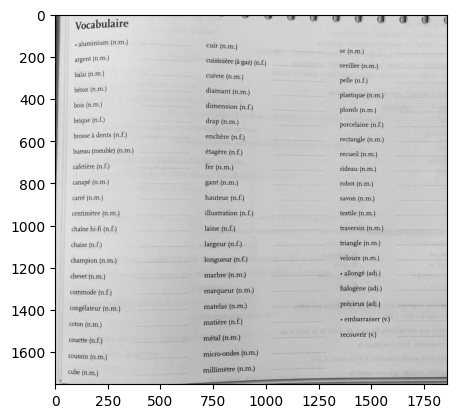

In [3]:
images = get_images()
plt.imshow(images[0], cmap='gray')

In [24]:
# def reshape_images(images):

#     resized_images = []
#     resolution = (1920, 1080) #HD
#     for image in images: 
#         res_img = cv2.resize(src=image, dsize=resolution, interpolation=cv2.INTER_CUBIC)
#         resized_images.append(res_img)
    
#     return resized_images


In [32]:
# def sharpen_images(images):

#     # Convolution Kernel 
#     kernel = np.array([
#         [-1, -1, -1],
#         [-1, 9, -1],
#         [-1, -1, -1]
#     ])

#     sharpened_images = []

#     for image in images: 
#         sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
#         sharpened_images.append(sharp_img)

#     return sharpened_images


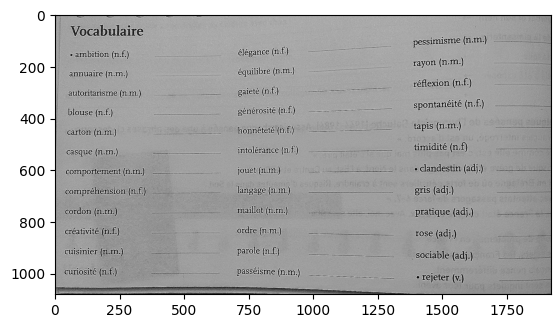

In [38]:
sharp_images = sharpen_images(resized_images)
plt.imshow(sharp_images[5], cmap='gray')

In [39]:
sharp_images[0].shape

(1080, 1920)

In [5]:
def read_images(images:list, reader_obj):

    read_words = []
    for image in images: 
        detec_words = reader_obj.readtext(image)
        read_words.extend(detec_words)

    return read_words

In [6]:
# Define Reader 
languages = ['fr']
reader_obj = Reader(languages)

words_detected = read_images(images, reader_obj)

In [8]:
only_words = [word for _, word, _ in words_detected]

In [10]:
only_words

['Vocabulaire',
 'aluminium (n.m)',
 'cuir (n.m)',
 'Or',
 '(nm)',
 '(n.m)',
 'cuisinière (à gaz) (n.f)',
 'oreiller (n.m)',
 'balai (n.m:)',
 'cuivre (nm:)',
 'pelle (nf)',
 'béton (nm:)',
 'diamant (nm:)',
 'plastique (n.m:)',
 'bois (n.m.)',
 'dimension (n.f:)',
 'plomb (n.m)',
 'brique (n.f)',
 '(nm)',
 'porcelaine (nf:)',
 'brosse à dents (n.f:)',
 'enchère (nf)',
 'rectangle (n.m:)',
 'bureau (meuble) (nm)',
 'étagère (nf)',
 'recueil (n.m.)',
 'cafetière (n.f:)',
 'fer (n.m)',
 'rideau (n.m)',
 'canapé (nm )',
 'gant (nm:)',
 'robot (n.m.)',
 'carré (n.m:)',
 'hauteur (nf)',
 'savon',
 '(n.m:)',
 'centimètre (n.m.)',
 'illustration (nf)',
 'textile (n.m.)',
 'chaîne hi-fi (nf)',
 'laine (nf)',
 'traversin (n.m)',
 'chaise (n.f)',
 'largeur (nf:)',
 'triangle (n.m:)',
 'champion (n.m:)',
 'longueur (n.f:)',
 'velours (n.m:)',
 'chevet (n.m.)',
 'marbre (nm)',
 'allongé (adj:)',
 'commode (nf:)',
 'marqueur (n.m:)',
 'halogène (adj:)',
 'congélateur (n.m:)',
 'matelas (n.m)',
 'pr

In [23]:
# Clear the words 
def prepare_words(words):

    EXCLUDE_WORDS = ['nm', 'nf', 'adj', 'v']

    clean_words = []
    for word in words: 
        clean_word = re.sub(r'[0-9.,:;~_\-/\\{}\[\]\(\)|]','',word)
        clean_word = clean_word.split(' ')
        for exc_word in EXCLUDE_WORDS: 
            if exc_word in clean_word: 
                clean_word.remove(exc_word)
        
        if clean_word:
            clean_words.append(' '.join(clean_word))
    
    return clean_words
    

In [24]:
cleaned_words = prepare_words(only_words)

In [26]:
words_set = set(cleaned_words)

In [29]:
test_words =list(words_set)

In [31]:
test_word = test_words[0]
print(test_word)

haras


In [ ]:
import spacy   

## Tiempos de conjugacion en frances
- Le present
- Le passe compose
- Le passe recent 
- Le passe simple 
- L'imparfait
- Le plus-que-parfait
- Le futur simple 
- Le futur compose
- Le futur anterieur

In [16]:
style_verbs = """

AIMER 
--------------------------------------------------------------------------
Present - Passé composé - L’imparfait - Futur simple - Conditionnel
Je - aime | aimé | aimais | aimerai | aimerais
Tu - aimes | aimé | aimais | aimerais | aimerais
Il/Elle - aime | aimé | aimait | aimera | aimerait
Nous - aimons | aimé | aimions | aimerons | aimerions
Vous - aimez | aimé | aimiez | aimerez | aimeriez
Ils/Elles - aiment | aimé | aimaient | aimeront | aimeraient
--------------------------------------------------------------------------

"""

In [17]:
style_adj = """

PETIT
----------------------------
Masculin | Feminin 
petit(s) - petite(s)
----------------------------

"""

In [18]:
style_noun = """

CHAT
-------------------------
Masculin: Chat(s)
Féminin: Chatte(s)
-------------------------

OPINION
-------------------------
Masculin: -
Féminin: Opinion(s)
-------------------------

ORDINATEUR
-------------------------
Masculin: Ordinateur(s)
Féminin: -
-------------------------

"""

In [19]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

In [20]:
import json 

with open('languages.json','rb') as file: 
    languages = json.load(file)

In [32]:
src_lang = languages['French']
tgt_lang = languages['Spanish']

print(f"Source language: {src_lang} | Target language: {tgt_lang}")

Source language: fr_XX | Target language: es_XX


In [26]:
model = MBartForConditionalGeneration.from_pretrained('facebook/mbart-large-50-many-to-many-mmt')
tokenizer = MBart50TokenizerFast.from_pretrained('facebook/mbart-large-50-many-to-many-mmt')

In [31]:
text = test[0]
print(f"Word being used: {text}")

Word being used: Vocabulaire


In [34]:
tokenizer.src_lang = src_lang
encoded_input = tokenizer(text, return_tensors='pt')
generated_tokens = model.generate(
    **encoded_input,
    forced_bos_token_id = tokenizer.lang_code_to_id[tgt_lang]
)

tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

['A/C.2/57/L.5 Temas de la Comisión Consultiva en Asuntos Administrativos y de Presupuesto - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009 - Proyecto de presupuesto por programas para el bienio 2008-2009

In [36]:
type(text)

str

In [1]:
# import openai

# from secrets_keys import OPENAI_API_KEY

In [2]:
openai.api_key = OPENAI_API_KEY

In [3]:
def get_response(prompt, model='gpt-3.5-turbo'):
    messages = [{
        'role': 'user',
        'content': prompt
    }]
    response = openai.ChatCompletion.create(
        model = model,
        messages = messages,
    )

    return response

In [4]:
prompt = 'En cuantos idiomas puedes escribir'

response = get_response(prompt)

In [6]:
response

<OpenAIObject chat.completion id=chatcmpl-8DmAU0jv1lbJZU9U93g7IC20opXSi at 0x1121d27b0> JSON: {
  "id": "chatcmpl-8DmAU0jv1lbJZU9U93g7IC20opXSi",
  "object": "chat.completion",
  "created": 1698294114,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Puedo responder preguntas y escribir en varios idiomas, como ingl\u00e9s, espa\u00f1ol, franc\u00e9s, alem\u00e1n, italiano, portugu\u00e9s, neerland\u00e9s, ruso, chino, japon\u00e9s, coreano, entre otros. Sin embargo, mi nivel de fluidez y precisi\u00f3n puede variar seg\u00fan el idioma."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 16,
    "completion_tokens": 72,
    "total_tokens": 88
  }
}